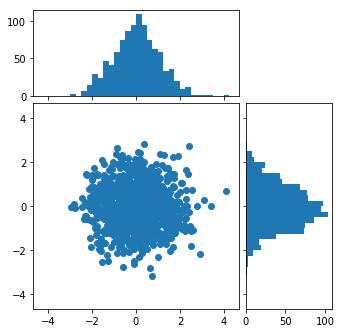

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# the random data
x = np.random.randn(1000)
y = np.random.randn(1000)


fig, axScatter = plt.subplots(figsize=(5.5, 5.5))

# the scatter plot:
axScatter.scatter(x, y)
axScatter.set_aspect(1.)

# create new axes on the right and on the top of the current axes
# The first argument of the new_vertical(new_horizontal) method is
# the height (width) of the axes to be created in inches.
divider = make_axes_locatable(axScatter)
axHistx = divider.append_axes("top", 1.2, pad=0.1, sharex=axScatter)
axHisty = divider.append_axes("right", 1.2, pad=0.1, sharey=axScatter)

# make some labels invisible
plt.setp(axHistx.get_xticklabels() + axHisty.get_yticklabels(),
         visible=False)

# now determine nice limits by hand:
binwidth = 0.25
xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
lim = (int(xymax/binwidth) + 1)*binwidth

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

# the xaxis of axHistx and yaxis of axHisty are shared with axScatter,
# thus there is no need to manually adjust the xlim and ylim of these
# axis.

#axHistx.axis["bottom"].major_ticklabels.set_visible(False)
for tl in axHistx.get_xticklabels():
    tl.set_visible(False)
axHistx.set_yticks([0, 50, 100])

#axHisty.axis["left"].major_ticklabels.set_visible(False)
for tl in axHisty.get_yticklabels():
    tl.set_visible(False)
axHisty.set_xticks([0, 50, 100])

plt.draw()
plt.show()

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
from ipywidgets import *

# set a common x for plotting, some tails will be longer
x = np.arange(-7,7,0.005)

def normal_plot(f):
    # null hypothesis, 2-tailed
    mu1 = f
    variance1 = 1
    sigma1 = math.sqrt(variance1)
    # x1 = np.linspace(mu1-3*variance1,mu1+3*variance1, 1000)
    y1 = mlab.normpdf(x, mu1, sigma1)
    plt.plot(x,mlab.normpdf(x, mu1, sigma1))

    # alternative hypothesis, 1-tailed
    mu2 = 2
    variance2 = 1
    sigma2 = math.sqrt(variance2)
    # x2 = np.linspace(mu2-3*variance2,mu2+3*variance2, 1000)
    y2 = mlab.normpdf(x, mu2, sigma2)
    plt.plot(x,mlab.normpdf(x, mu2, sigma2))

    axes = plt.gca()
    axes.set_xlim([-5,5])
    axes.set_ylim([0,0.5])

    plt.fill_between(x, 0, y1, where=y1 <= y2)

    plt.show()

interact(normal_plot, f=(0,5,0.2))
# http://scipy-cookbook.readthedocs.io/items/Matplotlib_SigmoidalFunctions.html


<function __main__.normal_plot>

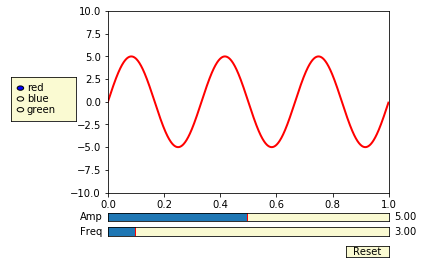

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
s = a0*np.sin(2*np.pi*f0*t)
l, = plt.plot(t, s, lw=2, color='red')
plt.axis([0, 1, -10, 10])

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)


def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()
sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

plt.show()